In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os


In [14]:
# Dataset ka path
dataset_path = "C:\\Users\\nishi\\Downloads\\FoodDataset"

In [16]:
# Image size and parameters
img_height, img_width = 150, 150
batch_size = 32


In [18]:
# ImageDataGenerator for train and validation with rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% data validation ke liye
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # kyunki multi-class hai
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 795 images belonging to 1 classes.
Found 198 images belonging to 1 classes.


In [20]:
# CNN Model define karte hain
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer classes ke liye
])


In [22]:
# Model compile karte hain
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Model train karte hain
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 956ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 885ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 877ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 889ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 868ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 872ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 875ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s

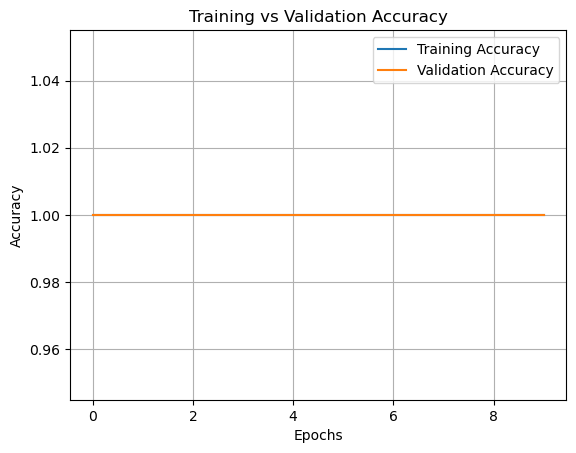

In [33]:
# Training and validation accuracy plot karte hain
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


C:\Users\nishi\anaconda3\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Image name: telur_dadar (1).jpg
Predicted class: ayam_goreng


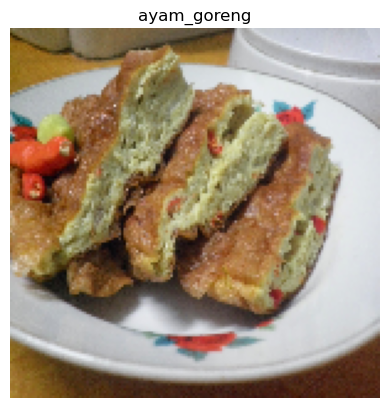

In [28]:
# ✅ 1. Import
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# ✅ 2. Load model
model = load_model("food_model.h5")

# ✅ 3. Define image size (jo training ke waqt use kiya tha)
img_height, img_width = 150, 150

# ✅ 4. Image ka path do (Google image ya apne dataset ki image)
img_path = r"C:\Users\nishi\Downloads\FoodDataset\dataset_padang_food\telur_dadar\telur_dadar (1).jpg"  # <-- Change this

# ✅ 5. Image ka naam nikalo
img_name = os.path.basename(img_path)

# ✅ 6. Load and preprocess image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# ✅ 7. Predict
predictions = model.predict(img_array)

# ✅ 8. Class index mapping (manually likho agar `train_generator` abhi nahi chala)
# ⚠️ Replace with your own class list in same order as training
class_labels = ['ayam_goreng', 'burger', 'chicken_curry', 'fried_rice', 'pizza']  # ← change as per your dataset

# ✅ 9. Result
predicted_index = np.argmax(predictions)
predicted_label = class_labels[predicted_index]

# ✅ 10. Output
print("Image name:", img_name)
print("Predicted class:", predicted_label)

# ✅ 11. Show image
plt.imshow(img)
plt.title(predicted_label)
plt.axis('off')
plt.show()
